In [3]:
import zipfile
#image_default = 1280x720
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt
import os
import time
import uuid
import cv2

In [99]:
os.listdir("E:\Work\JUPITERC\Hands\data/images")

['frame_0.jpg',
 'frame_1.jpg',
 'frame_10.jpg',
 'frame_10_1.jpg',
 'frame_10_2.jpg',
 'frame_11.jpg',
 'frame_11_1.jpg',
 'frame_11_2.jpg',
 'frame_12.jpg',
 'frame_12_1.jpg',
 'frame_12_2.jpg',
 'frame_12_3.jpg',
 'frame_12_4.jpg',
 'frame_13.jpg',
 'frame_13_1.jpg',
 'frame_13_2.jpg',
 'frame_13_3.jpg',
 'frame_13_4.jpg',
 'frame_14.jpg',
 'frame_14_1.jpg',
 'frame_14_2.jpg',
 'frame_14_3.jpg',
 'frame_15.jpg',
 'frame_15_1.jpg',
 'frame_15_2.jpg',
 'frame_15_3.jpg',
 'frame_16.jpg',
 'frame_16_1.jpg',
 'frame_16_2.jpg',
 'frame_17.jpg',
 'frame_18.jpg',
 'frame_2.jpg',
 'frame_21.jpg',
 'frame_21_1.jpg',
 'frame_22.jpg',
 'frame_22_1.jpg',
 'frame_22_2.jpg',
 'frame_23.jpg',
 'frame_23_1.jpg',
 'frame_23_2.jpg',
 'frame_23_3.jpg',
 'frame_24.jpg',
 'frame_24_1.jpg',
 'frame_24_2.jpg',
 'frame_24_3.jpg',
 'frame_24_4.jpg',
 'frame_25.jpg',
 'frame_25_1.jpg',
 'frame_25_2.jpg',
 'frame_25_3.jpg',
 'frame_25_4.jpg',
 'frame_26.jpg',
 'frame_26_1.jpg',
 'frame_26_2.jpg',
 'frame_27.jp

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices('GPU')

[]

In [6]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg')
images.as_numpy_iterator().next()

def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

images = images.map(load_image)

In [6]:
images.as_numpy_iterator().next()

array([[[201, 206, 200],
        [201, 206, 200],
        [201, 206, 200],
        ...,
        [187, 147, 137],
        [184, 144, 134],
        [180, 140, 130]],

       [[200, 205, 199],
        [200, 205, 199],
        [200, 205, 199],
        ...,
        [189, 149, 139],
        [188, 148, 138],
        [186, 146, 136]],

       [[199, 204, 198],
        [199, 204, 198],
        [199, 204, 198],
        ...,
        [191, 151, 141],
        [194, 154, 144],
        [193, 153, 143]],

       ...,

       [[177, 179, 174],
        [176, 178, 173],
        [176, 179, 172],
        ...,
        [ 17,  22,  28],
        [ 17,  22,  28],
        [ 17,  22,  28]],

       [[176, 178, 173],
        [176, 178, 173],
        [175, 178, 171],
        ...,
        [ 17,  22,  28],
        [ 17,  22,  28],
        [ 17,  22,  28]],

       [[176, 178, 173],
        [175, 177, 172],
        [175, 178, 171],
        ...,
        [ 17,  22,  28],
        [ 17,  22,  28],
        [ 17,  22,  28]]

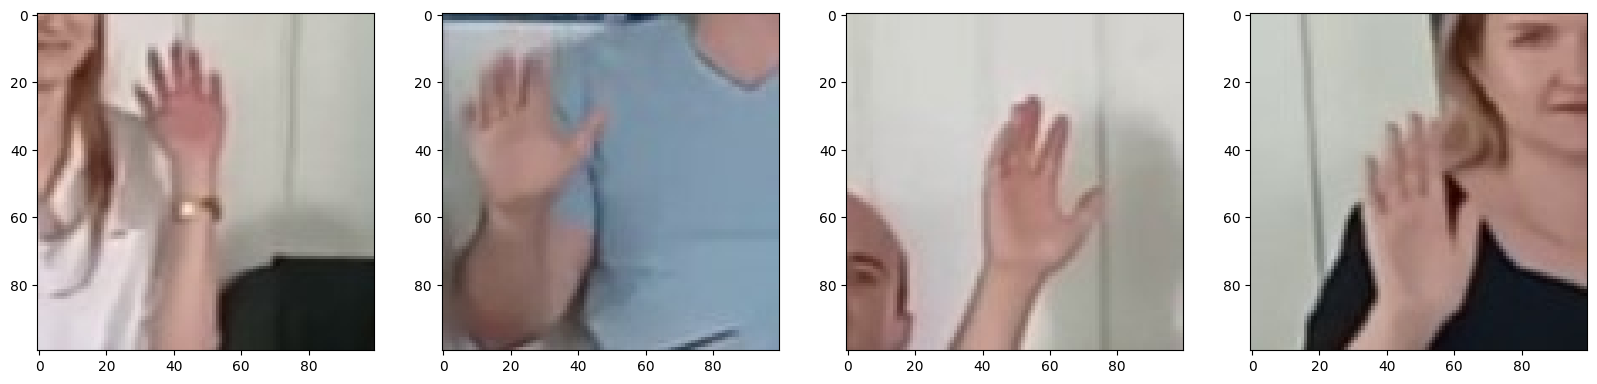

In [7]:
image_generator = images.batch(4).as_numpy_iterator()

plot_images = image_generator.next()

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

In [11]:
(212 -148) * 0.5

32.0

In [13]:
import os
import random
import shutil

data_path = "data/images"

# path to destination folders
train_folder = "E:\Work\JUPITERC\Hands\data/train\images"
val_folder = "E:\Work\JUPITERC\Hands\data/val\images"
test_folder = "E:\Work\JUPITERC\Hands\data/test\images"

# Define a list of image extensions
image_extensions = ['.jpg', '.jpeg', '.png', '.bmp']

# Create a list of image filenames in 'data_path'
imgs_list = [filename for filename in os.listdir(data_path) if os.path.splitext(filename)[-1] in image_extensions]

# Sets the random seed 
random.seed(42)

# Shuffle the list of image filenames
random.shuffle(imgs_list)

# determine the number of images for each set
train_size = 148
val_size = 32
test_size = 32

# Create destination folders if they don't exist
for folder_path in [train_folder, val_folder, test_folder]:
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

# Copy image files to destination folders
for i, f in enumerate(imgs_list):
    if i < train_size:
        dest_folder = train_folder
    elif i < train_size + val_size:
        dest_folder = val_folder
    else:
        dest_folder = test_folder
    shutil.copy(os.path.join(data_path, f), os.path.join(dest_folder, f))

In [14]:
# 148 train 32 test 32 val
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)    

In [2]:
import albumentations as alb

In [16]:
img = cv2.imread('E:\Work\JUPITERC\Hands\data/train\images/frame_0.jpg')
print(img.shape)

(100, 100, 3)


In [7]:
augmentor = alb.Compose([alb.RandomCrop(width=100, height=100), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

In [18]:
img = cv2.imread(os.path.join('data','train', 'images','frame_8_2.jpg'))

In [19]:
with open(os.path.join('data', 'train', 'labels', 'frame_8_2.json'), 'r') as f:
    label = json.load(f)

In [21]:
coords = [item['points'] for item in label['shapes']]
print(coords[0])

[[26.049999999999997, 37.1], [77.35000000000001, 88.4]]


In [31]:
coords_resize = [[[(item[0] / 100), (item[1] / 100)] for item in sublist] for sublist in coords]
print(coords_resize)

[[[0.26049999999999995, 0.371], [0.7735000000000001, 0.884]]]


In [32]:
import ast 
nested_list = ast.literal_eval(str(coords_resize))
coords_reshape = [item[0] + item[1] for item in nested_list]
print(coords_reshape)

[[0.26049999999999995, 0.371, 0.7735000000000001, 0.884]]


In [35]:
augmented = augmentor(image=img, bboxes=[coords_reshape[0]], class_labels=['palm'])

In [40]:
augmented['bboxes'][0][:2]

(0.26049999999999995, 0.371)

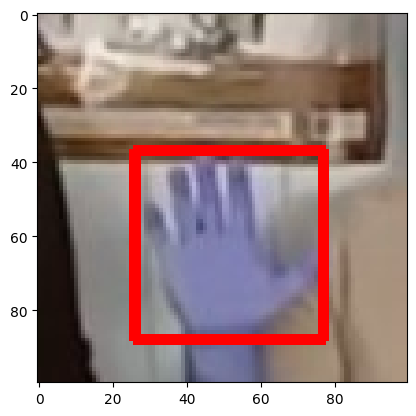

In [41]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [100,100]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [100,100]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

In [ ]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords = [item['points'] for item in label['shapes']]
            
            
            coords = [[[(item[0] / 100), (item[1] / 100)] for item in sublist] for sublist in coords]
            

            nested_list = ast.literal_eval(str(coords))
            coords = [item[0] + item[1] for item in nested_list]

        try: 
            for x in range(60): 
                augmented = augmentor(image=img, bboxes=[coords[0]], class_labels=['palm'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

In [8]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: x/255)

In [9]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: x/255)

In [10]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: x/255)

In [11]:
train_images.as_numpy_iterator().next()

array([[[0.4745098 , 0.28627452, 0.24705882],
        [0.46666667, 0.2784314 , 0.23921569],
        [0.49803922, 0.30980393, 0.27058825],
        ...,
        [0.7058824 , 0.5137255 , 0.45882353],
        [0.7019608 , 0.50980395, 0.45490196],
        [0.7019608 , 0.50980395, 0.45490196]],

       [[0.5019608 , 0.3137255 , 0.27450982],
        [0.47843137, 0.2901961 , 0.2509804 ],
        [0.48235294, 0.29411766, 0.25490198],
        ...,
        [0.7058824 , 0.5137255 , 0.45882353],
        [0.7019608 , 0.50980395, 0.45490196],
        [0.69803923, 0.5058824 , 0.4509804 ]],

       [[0.57254905, 0.38431373, 0.34509805],
        [0.5647059 , 0.3764706 , 0.3372549 ],
        [0.56078434, 0.3764706 , 0.3372549 ],
        ...,
        [0.70980394, 0.5058824 , 0.4509804 ],
        [0.7058824 , 0.5019608 , 0.44705883],
        [0.7058824 , 0.5019608 , 0.44705883]],

       ...,

       [[0.5294118 , 0.63529414, 0.70980394],
        [0.5294118 , 0.63529414, 0.70980394],
        [0.5294118 , 0

In [12]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [13]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [14]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [15]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [16]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.3835, 0.079 , 0.7383, 0.557 ], dtype=float16))

In [54]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(8880, 8880, 1920, 1920, 1920, 1920)

In [17]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(10000)
train = train.batch(8)
train = train.prefetch(4)

In [18]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(3000)
test = test.batch(8)
test = test.prefetch(4)

In [19]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(3000)
val = val.batch(8)
val = val.prefetch(4)

In [60]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.5747, 0.081 , 0.9585, 0.582 ],
        [0.4326, 0.438 , 0.9077, 0.933 ],
        [0.0365, 0.102 , 0.4185, 0.636 ],
        [0.3416, 0.205 , 0.6255, 0.611 ],
        [0.0625, 0.432 , 0.4785, 0.971 ],
        [0.5845, 0.217 , 0.7754, 0.665 ],
        [0.1584, 0.326 , 0.5293, 0.89  ],
        [0.0085, 0.377 , 0.3665, 0.974 ]], dtype=float16))

In [20]:
data_samples = train.as_numpy_iterator()

In [21]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


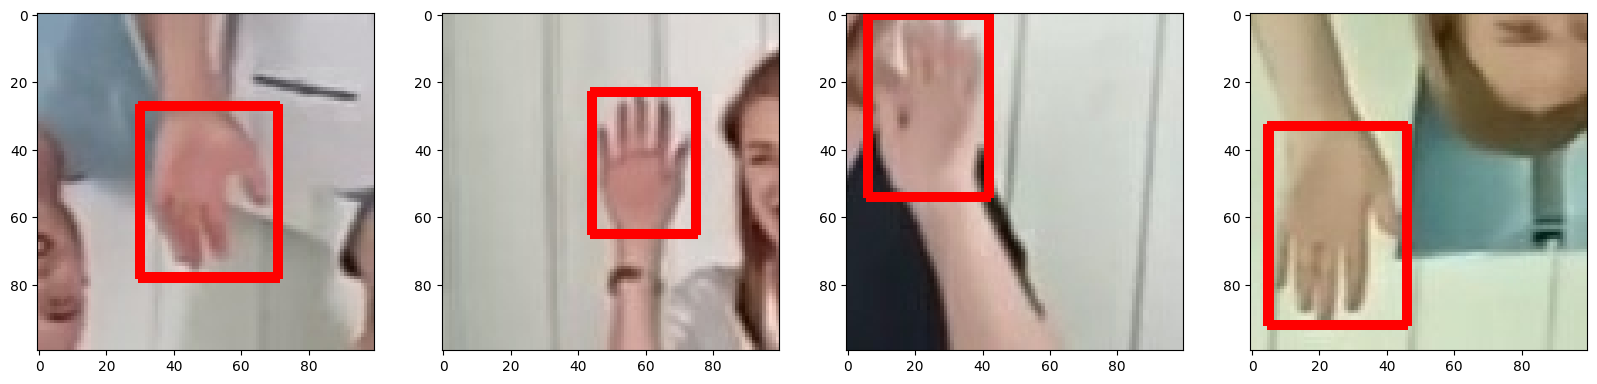

In [22]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [100,100]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [100,100]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

In [23]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [71]:
vgg = VGG16(include_top=False)

58889256/58889256 [==============================] - 11s 0us/step


In [72]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [73]:
def build_model(): 
    input_layer = Input(shape=(100,100,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    palm_count = Model(inputs=input_layer, outputs=[class2, regress2])
    return palm_count

In [74]:
palm_count = build_model()

In [75]:
palm_count.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_2[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

In [76]:
X, y = train.as_numpy_iterator().next()

In [77]:
X.shape

(8, 100, 100, 3)

In [78]:
classes, coords = palm_count.predict(X)

1/1 [==============================] - 1s 593ms/step


In [79]:
classes, coords

(array([[0.5654971 ],
        [0.49988556],
        [0.48584303],
        [0.47065634],
        [0.46712866],
        [0.52999854],
        [0.5355851 ],
        [0.4750418 ]], dtype=float32),
 array([[0.4541275 , 0.5751463 , 0.5866409 , 0.520552  ],
        [0.46558154, 0.63483536, 0.6739096 , 0.5072033 ],
        [0.47086033, 0.5890841 , 0.63446814, 0.5586486 ],
        [0.51562864, 0.5392253 , 0.65042216, 0.5196949 ],
        [0.5203551 , 0.5259761 , 0.5759185 , 0.47612688],
        [0.4824362 , 0.59543806, 0.6833454 , 0.51404864],
        [0.4607297 , 0.6122621 , 0.6932379 , 0.4898252 ],
        [0.49351075, 0.62082815, 0.6700072 , 0.48110357]], dtype=float32))

In [25]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [26]:
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=lr_decay)

In [27]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [28]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [90]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=4.4473424>

In [91]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.6879626>

In [92]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=4.4473424>

In [93]:
class Palm_count(Model): 
    def __init__(self, palm_count,  **kwargs): 
        super().__init__(**kwargs)
        self.model = palm_count

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            #Tune 0.5 if u wanna
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [94]:
model = Palm_count(palm_count)

In [95]:
model.compile(opt, classloss, regressloss)

In [96]:
logdir='logs'

In [97]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

In [ ]:
hist.history

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [2]:
from tensorflow.keras.models import load_model

palm_count = load_model('palm_count.h5', compile=False)

In [30]:
test_data = test.as_numpy_iterator()

In [31]:
test_sample = test_data.next()

In [32]:
yhat = palm_count.predict(test_sample[0])

1/1 [==============================] - 1s 563ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


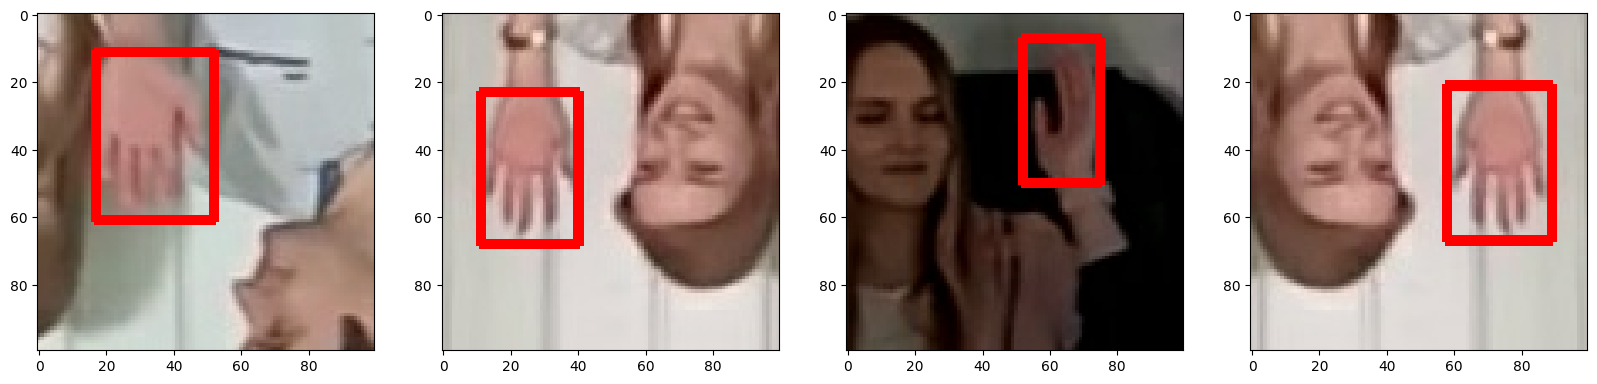

In [33]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [100,100]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [100,100]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

In [6]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[100:1280, 100:720,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (100,100))
    
    yhat = palm_count.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [1280,720]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [1280,720]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [1280,720]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [1280,720]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'palm', tuple(np.add(np.multiply(sample_coords[:2], [1280,720]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('PalmCount', frame)
    print(yhat)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 81ms/step
[array([[1.]], dtype=float32), array([[0.3446686, 0.2338111, 0.575298 , 0.7108744]], dtype=float32)]
1/1 [==============================] - 0s 91ms/step
[array([[1.]], dtype=float32), array([[0.34387147, 0.23377118, 0.5757848 , 0.7104081 ]], dtype=float32)]
1/1 [==============================] - 0s 81ms/step
[array([[1.]], dtype=float32), array([[0.3444445 , 0.2335118 , 0.57674164, 0.7102037 ]], dtype=float32)]
1/1 [==============================] - 0s 67ms/step
[array([[1.]], dtype=float32), array([[0.34372094, 0.23312649, 0.57664514, 0.7101805 ]], dtype=float32)]
1/1 [==============================] - 0s 62ms/step
[array([[1.]], dtype=float32), array([[0.3446796 , 0.23275037, 0.57744116, 0.7096513 ]], dtype=float32)]
1/1 [==============================] - 0s 61ms/step
[array([[1.]], dtype=float32), array([[0.34346506, 0.23250732, 0.5766007 , 0.7099164 ]], dtype=float32)]
1/1 [==============================] - 0s 59ms/step
[array([[1